In [1]:
# Setup Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotSlope import slope

rank_data = pd.read_csv("./Resources/collegeRanksCSV.csv")

In [2]:
#Check Output
rank_data.head()

,SCHOOL,2008,2009,2010,2011,2012,2013,2014,2015,AVG RANK,CHG 08 VS 15
0,Princeton,1,2,1,2,1,1,1,1,1.250,0
1,Harvard,2,1,1,1,1,1,2,2,1.375,0
2,Yale,3,3,3,3,3,3,3,3,3.000,0
3,Stanford,4,4,4,5,5,6,5,4,4.625,0
4,Columbia,9,8,8,4,4,4,4,4,5.625,5


In [3]:
#Assign Column Names
school=rank_data['SCHOOL']
rank_08 = rank_data['2008']
rank_09 = rank_data['2009']
rank_10 = rank_data['2010']
rank_11 = rank_data['2011']
rank_12 = rank_data['2012']
rank_13 = rank_data['2013']
rank_14 = rank_data['2014']
rank_15 = rank_data['2015']
change = rank_data['CHG 08 VS 15']
avg_rank = rank_data['AVG RANK']

In [4]:
#Average Change of School Rank is ~ -0.76
#This implies that we expect that the average school to show a shift of approximately -3/4 rank over the course of six years
avg = sum(change)/125
print("Average Change is :", avg) 

Average Change is : -0.76


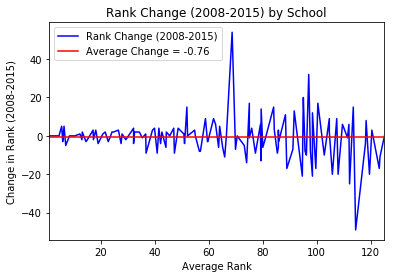

In [24]:
#Build Plot for Rank Change
#There is no major change amongst the top 25 schools 
#However, there are much more volatile changes as we transverse the graph towards schools in the lower range, which we plan to investigate further 
rank_change= plt.plot(avg_rank, change, color="blue", label="Rank Change (2008-2015)" )

#Plot Horizontal Line Representing Average Change Calculated Above
plt.plot(avg_rank, (change *0)-0.76, color = "red", label= 'Average Change = -0.76')

#Incorporate Other Graph Attributes
plt.legend()
# plt.xticks(rotation = 90)
# plt.rcParams["figure.figsize"] = [16,9]
plt.title("Rank Change (2008-2015) by School")
plt.xlim(1,125,5)
plt.ylabel("Change in Rank (2008-2015)")
plt.xlabel("Average Rank")

#Save Chart as PNG File
plt.savefig('./rank_change.png')
plt.show()

In [6]:
#Northeastern
max(change)

54

In [7]:
#Howard University 
min(change)

-49

In [8]:
#Filter for Yearly Rank Data Only
df = rank_data.drop(['AVG RANK', 'CHG 08 VS 15', '2008'], axis=1)
df = df.set_index('SCHOOL')

#For the purposes of identifying points of greatest change, we are focusing on 20 schools in total
#10 schools that showed the most negative change and 10 schools that showed the most positive change 
#'2008' was dropped because we could not call data from the Census API
#The data set was ordered by avg rank. But this did not contribute later on and was removed. 

rank_change=rank_data.sort_values(by='CHG 08 VS 15', ascending=False)
#Drexel is included in this dataset though it looks that had dropped 6 ranks over the years. 
top_10_change =rank_change.head(10)
top_10_change = top_10_change.drop(['AVG RANK', 'CHG 08 VS 15', '2008'], axis=1)
top_10 = top_10_change.set_index('SCHOOL')
top_10

,2009,2010,2011,2012,2013,2014,2015
SCHOOL,,,,,,,
Northeastern,96,80,69,62,56,49,42
TCU,113,110,99,97,92,82,76
Massachusetts Amherst,102,106,99,94,97,91,76
Brigham Young,113,71,75,71,68,62,62
Florida St,102,102,104,101,97,91,95
Boston Univ,60,56,56,53,51,41,42
Univ at Buffalo,121,121,120,111,106,109,103
Clark,80,88,86,94,83,75,76
American,83,84,79,82,77,75,71


In [9]:
#Sort for School Reflecting the Most Negative Change Over Time
rank_change=rank_data.sort_values(by='CHG 08 VS 15', ascending=True)
bottom_10_change =rank_change.head(10)
bottom_10_change = bottom_10_change.drop(['AVG RANK', 'CHG 08 VS 15', '2008'], axis=1)
bottom_10 = bottom_10_change.set_index('SCHOOL')
bottom_10

,2009,2010,2011,2012,2013,2014,2015
SCHOOL,,,,,,,
Howard,102,96,104,111,120,142,145
Arizona,96,102,120,124,120,119,121
Iowa St,89,88,94,94,101,101,106
Kansas,89,96,104,101,106,101,106
Pacific,102,115,99,101,106,112,116
Washington St,116,106,111,115,125,128,138
Illinois Tech,102,106,111,111,113,109,116
St. Louis,80,84,86,88,92,101,99
UC Riverside,89,96,94,97,101,112,113


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125 entries, Princeton to Arizona St
Data columns (total 7 columns):
2009    125 non-null int64
2010    125 non-null int64
2011    125 non-null int64
2012    125 non-null int64
2013    125 non-null int64
2014    125 non-null int64
2015    125 non-null int64
dtypes: int64(7)
memory usage: 7.8+ KB


In [11]:
#Before building a slope chart, a 3D polygon chart, a waterfall plot, a dumbbell plot, and a multi-year line plot were considered
#But the last 3 did not produce the rank visualizations I would like
#And I could not produce a figure with the 3D polygon plot
#Make Slope Chart for All Top 125 School Ranks
# f = slope(df,height=12,width=8,font_size=20, savename='all_ranks.png')
#We were able to produce a plot from the code above
#But we want to reduce the noise and zero in on where the change is actually happening

In [12]:
#Create Optional Color Dictionary for Top 10 Data
top_color  = {"Univ at Buffalo":'red',
          'TCU':'orange',
          'Brigham Young':'chocolate',
          'Massachusetts Amherst': 'green', 
          'Florida St':'blue',
          'Northeastern':'navy',
          'Drexel':'purple',
          'American':'brown',
          'Clark':'maroon',
           'Boston Univ': 'black'}

C:\Users\zhiyi\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['GillSans'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


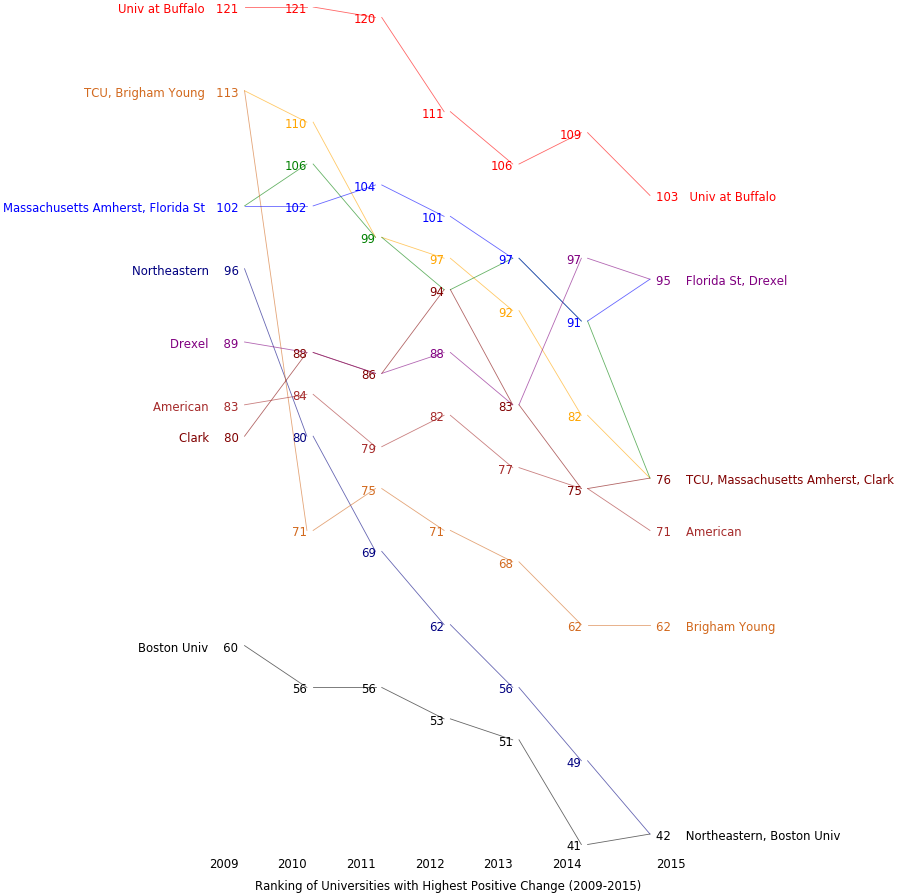

In [13]:
#Create Slope Plot for Schools with Most Positive Change
f = slope(top_10,color = top_color, height=30,width=30,font_size=28, savename='top_ranks.png', title = 'Ranking of Universities with Highest Positive Change (2009-2015)')  

In [14]:
#Create Optional Color Dictionary for Bottom 10 Data Frame
bot_color  = {"Howard":'red',
          'Washington St':'orange',
          'Ohio Univ':'chocolate',
          'Arizona': 'green', 
          'Pacific':'blue',
          'Illinois Tech':'navy',
          'UC Riverside':'purple',
          'Iowa St':'brown',
          'St. Louis':'maroon',
             'Kansas': 'black'}

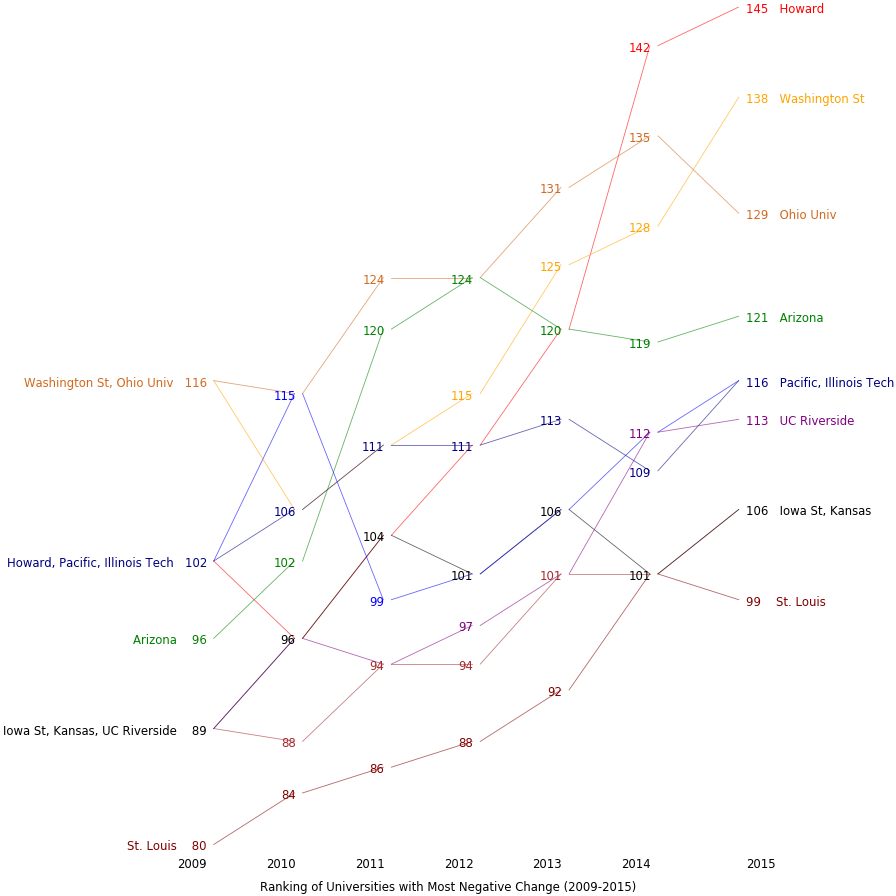

In [15]:
#Create Slope Plot for Schools with Most Negative Change
f = slope(bottom_10, color = bot_color, height=30,width=30,font_size=28, savename='bot_ranks.png',  title = 'Ranking of Universities with Most Negative Change (2009-2015)' )  

In [16]:
#Make Rankings Negative to Invert Charts
#The original idea was to invert the chart order by editing the source code. 
# But there was no documentation at the source to indicate how to do so. 
#Tried adjusting "Ascending = False" to True in plotSlope.py, which didn't work. 
rank_09 = top_10['2009']
neg_09= [ -x for x in rank_09]

rank_10 = top_10['2010']
neg_10= [ -x for x in rank_10]

rank_11 = top_10['2011']
neg_11= [ -x for x in rank_11]

rank_12 = top_10['2012']
neg_12= [ -x for x in rank_12]

rank_13 = top_10['2013']
neg_13= [ -x for x in rank_13]

rank_14 = top_10['2014']
neg_14= [ -x for x in rank_14]

rank_15 = top_10['2015']
neg_15= [ -x for x in rank_15]

In [17]:
#Make Rankings Negative to Invert Charts
rank_09 = bottom_10['2009']
bneg_09= [-x for x in rank_09]

rank_10 = bottom_10['2010']
bneg_10= [ -x for x in rank_10]

rank_11 = bottom_10['2011']
bneg_11= [ -x for x in rank_11]

rank_12 = bottom_10['2012']
bneg_12= [ -x for x in rank_12]

rank_13 = bottom_10['2013']
bneg_13= [ -x for x in rank_13]

rank_14 =  bottom_10 ['2014']
bneg_14= [ -x for x in rank_14]

rank_15 =  bottom_10['2015']
bneg_15= [ -x for x in rank_15]

In [18]:
#Assigning Negative Values to Columns in Top 10 DataFrame to Invert Original Slope Chart
# - top_10['2009']
top_10['2009'] = neg_09
top_10['2010'] = neg_10
top_10['2011'] = neg_11
top_10['2012'] = neg_12
top_10['2013'] = neg_13
top_10['2014'] = neg_14
top_10['2015'] = neg_15

In [19]:
#Display Data to Confirm Values are Correct
top_10

,2009,2010,2011,2012,2013,2014,2015
SCHOOL,,,,,,,
Northeastern,-96,-80,-69,-62,-56,-49,-42
TCU,-113,-110,-99,-97,-92,-82,-76
Massachusetts Amherst,-102,-106,-99,-94,-97,-91,-76
Brigham Young,-113,-71,-75,-71,-68,-62,-62
Florida St,-102,-102,-104,-101,-97,-91,-95
Boston Univ,-60,-56,-56,-53,-51,-41,-42
Univ at Buffalo,-121,-121,-120,-111,-106,-109,-103
Clark,-80,-88,-86,-94,-83,-75,-76
American,-83,-84,-79,-82,-77,-75,-71


In [20]:
#Assigning Negative Values to Columns in Bottom 10 DataFrame to Invert Original Slope Chart
#Ditto for this df. 
bottom_10['2009'] = bneg_09
bottom_10['2010'] = bneg_10
bottom_10['2011'] = bneg_11
bottom_10['2012'] = bneg_12
bottom_10['2013'] = bneg_13
bottom_10['2014'] = bneg_14
bottom_10['2015'] = bneg_15

In [21]:
#Display Data to Confirm Values are Correct
bottom_10

,2009,2010,2011,2012,2013,2014,2015
SCHOOL,,,,,,,
Howard,-102,-96,-104,-111,-120,-142,-145
Arizona,-96,-102,-120,-124,-120,-119,-121
Iowa St,-89,-88,-94,-94,-101,-101,-106
Kansas,-89,-96,-104,-101,-106,-101,-106
Pacific,-102,-115,-99,-101,-106,-112,-116
Washington St,-116,-106,-111,-115,-125,-128,-138
Illinois Tech,-102,-106,-111,-111,-113,-109,-116
St. Louis,-80,-84,-86,-88,-92,-101,-99
UC Riverside,-89,-96,-94,-97,-101,-112,-113


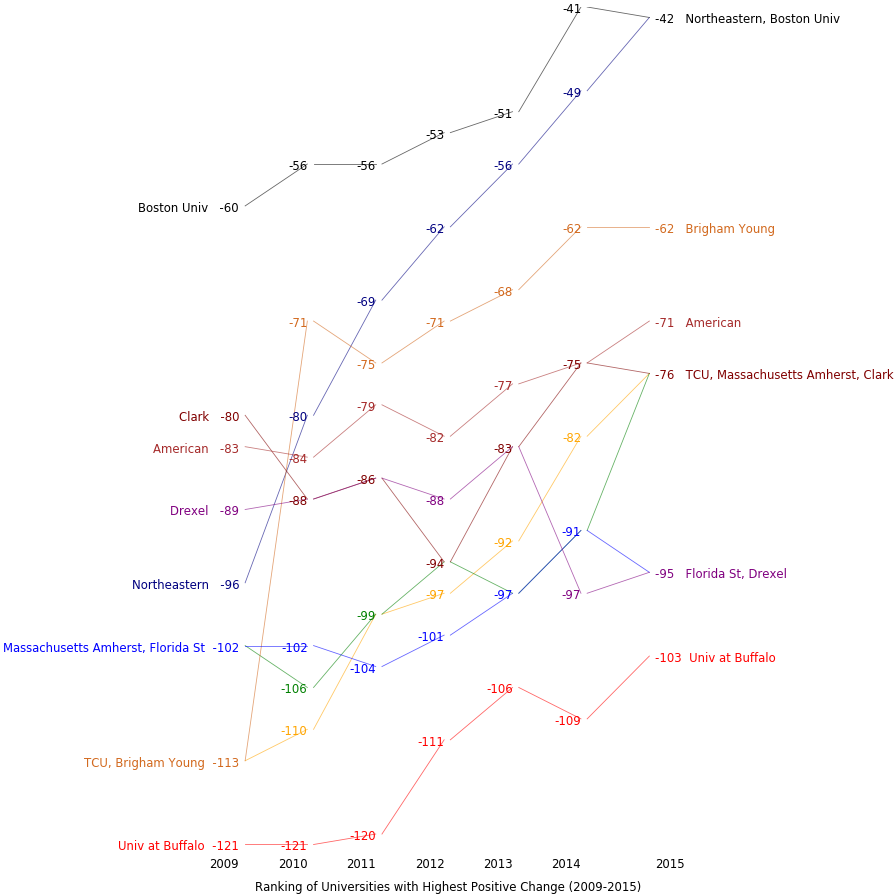

In [22]:
#Create New Inverted Plot Chart for Positive Change
f = slope(top_10,color = top_color, height=30,width=30,font_size=28, savename='top_ranks.png', title = 'Ranking of Universities with Highest Positive Change (2009-2015)')  

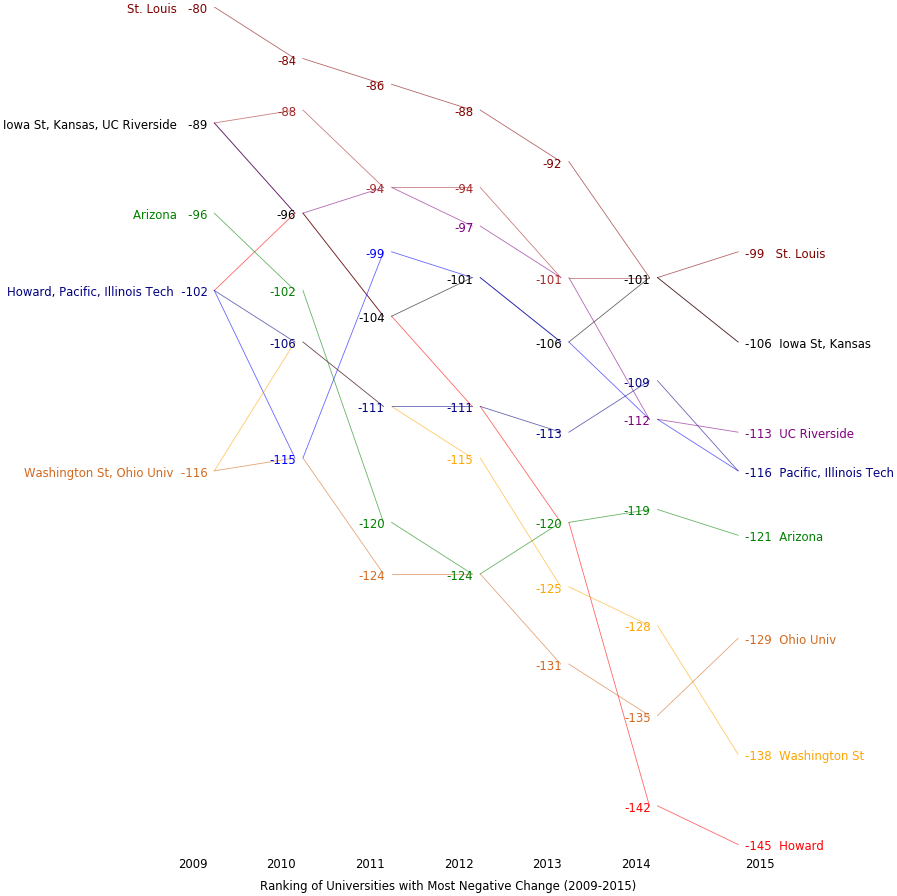

In [23]:
#Create New Inverted Slope Plot for Negative Change
f = slope(bottom_10, color = bot_color, height=30,width=30,font_size=28, savename='bot_ranks.png',  title = 'Ranking of Universities with Most Negative Change (2009-2015)' )  